### Census Income Project
#### Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). **The prediction task is to determine whether a person makes over $50K a year**.



#### Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.




In [283]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [189]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [190]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [191]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Checking what are the categories in theese columns**

In [193]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [194]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [195]:
Edu =  [' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',  ' 9th', ' 10th', ' 11th', 
        ' 12th', ' HS-grad',' Prof-school', ' Assoc-voc', ' Assoc-acdm',
       ' Some-college',' Bachelors', ' Masters', ' Doctorate',]       

**Concert the Education in Numerical**

In [196]:
from sklearn.preprocessing import OrdinalEncoder

In [197]:
Ordi = OrdinalEncoder(categories=[Edu])

In [198]:
Ordi.fit(df[['Education']])

OrdinalEncoder(categories=[[' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th',
                            ' 9th', ' 10th', ' 11th', ' 12th', ' HS-grad',
                            ' Prof-school', ' Assoc-voc', ' Assoc-acdm',
                            ' Some-college', ' Bachelors', ' Masters',
                            ' Doctorate']])

In [202]:
orno = OrdinalEncoder(categories= [[' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th',
                            ' 9th', ' 10th', ' 11th', ' 12th', ' HS-grad',
                            ' Prof-school', ' Assoc-voc', ' Assoc-acdm',
                            ' Some-college', ' Bachelors', ' Masters',
                            ' Doctorate']])


dfi = orno.fit_transform(df[['Education']])
dfi

array([[13.],
       [ 8.],
       [ 6.],
       ...,
       [ 8.],
       [ 8.],
       [ 8.]])

**Orverride Education content column wiht codes**

In [203]:
df['Education'] = dfi

In [204]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13.0,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,8.0,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,6.0,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13.0,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14.0,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,11.0,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,8.0,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,8.0,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,8.0,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [205]:
df['Native_country'].value_counts()


# 583 are missing

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [206]:
df['Workclass'].value_counts()

# 1836 are missing

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [207]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [208]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [209]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [210]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [211]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [212]:
df['Occupation'].value_counts()

# 1843 Missing value

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [215]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13.0,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,8.0,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,6.0,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13.0,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14.0,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,11.0,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,8.0,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,8.0,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,8.0,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**CLubbing the categories with the most suitable similar category**

In [216]:
# replace elements in list


df['Marital_status'].replace(
    to_replace=['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse'],
    value='Married',
    inplace=True,
    regex=True,
    method='pad',
)


df['Marital_status'].replace(
    to_replace= ['Separated','Divorced'],
    value= 'Separated',
    inplace= True,
    regex=True,
    method='pad',
)

df['Marital_status'].value_counts

<bound method IndexOpsMixin.value_counts of 0               Married
1             Separated
2               Married
3               Married
4               Married
              ...      
32555           Married
32556           Married
32557           Widowed
32558     Never-married
32559           Married
Name: Marital_status, Length: 32560, dtype: object>

In [217]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13.0,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,8.0,9,Separated,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,6.0,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13.0,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14.0,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,11.0,12,Married,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,8.0,9,Married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,8.0,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,8.0,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**Clubbing the category**

In [218]:

#replace elements in list.
df['Workclass'].replace(to_replace = ['Self-emp-not-inc','Self-emp-inc'] ,value = 'Self_employed',inplace= True,regex=True, method='pad')
df['Workclass'].replace(to_replace = ['Local-gov','State-gov','Federal-gov'],value = 'Govt_employees',inplace = True,regex=True, method='pad' )

df['Workclass'].value_counts()

 Private           22696
 Govt_employees     4350
 Self_employed      3657
 ?                  1836
 Without-pay          14
 Never-worked          7
Name: Workclass, dtype: int64

In [219]:
df['Workclass'] = df['Workclass'].replace(' ?', ' Self')
df['Occupation'] = df['Occupation'].replace(' ?', '  Misc')
df['Native_country'] = df['Native_country'].replace(' ?', ' United--States')

Charting the data to understand the relation

In [220]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

Text(0, 0.5, 'Frequency')

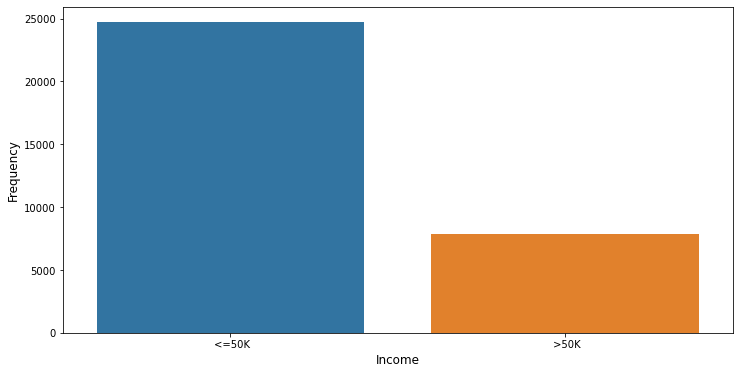

In [221]:
plt.figure(figsize =(12,6))
ax=sns.countplot(x = 'Income', data = df)
plt.xlabel("Income",fontsize = 12)
plt.ylabel("Frequency",fontsize = 12)

25000 have salary less than 50k and  7500 have salary more than 50

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32560 non-null  int64  
 1   Workclass       32560 non-null  object 
 2   Fnlwgt          32560 non-null  int64  
 3   Education       32560 non-null  float64
 4   Education_num   32560 non-null  int64  
 5   Marital_status  32560 non-null  object 
 6   Occupation      32560 non-null  object 
 7   Relationship    32560 non-null  object 
 8   Race            32560 non-null  object 
 9   Sex             32560 non-null  object 
 10  Capital_gain    32560 non-null  int64  
 11  Capital_loss    32560 non-null  int64  
 12  Hours_per_week  32560 non-null  int64  
 13  Native_country  32560 non-null  object 
 14  Income          32560 non-null  object 
dtypes: float64(1), int64(6), object(8)
memory usage: 3.7+ MB


In [223]:
dfnum = df.select_dtypes(include=['int64', 'float64'])
print(dfnum.columns)
['Age', 'Fnlwgt', 'Education', 'Education-num', 'Capital_gain', 'Capital_loss',        'Hours-per-week', 'Income']

Index(['Age', 'Fnlwgt', 'Education', 'Education_num', 'Capital_gain',
       'Capital_loss', 'Hours_per_week'],
      dtype='object')


['Age',
 'Fnlwgt',
 'Education',
 'Education-num',
 'Capital_gain',
 'Capital_loss',
 'Hours-per-week',
 'Income']

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>,
        <AxesSubplot:title={'center':'Capital_loss'}>],
       [<AxesSubplot:title={'center':'Hours_per_week'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

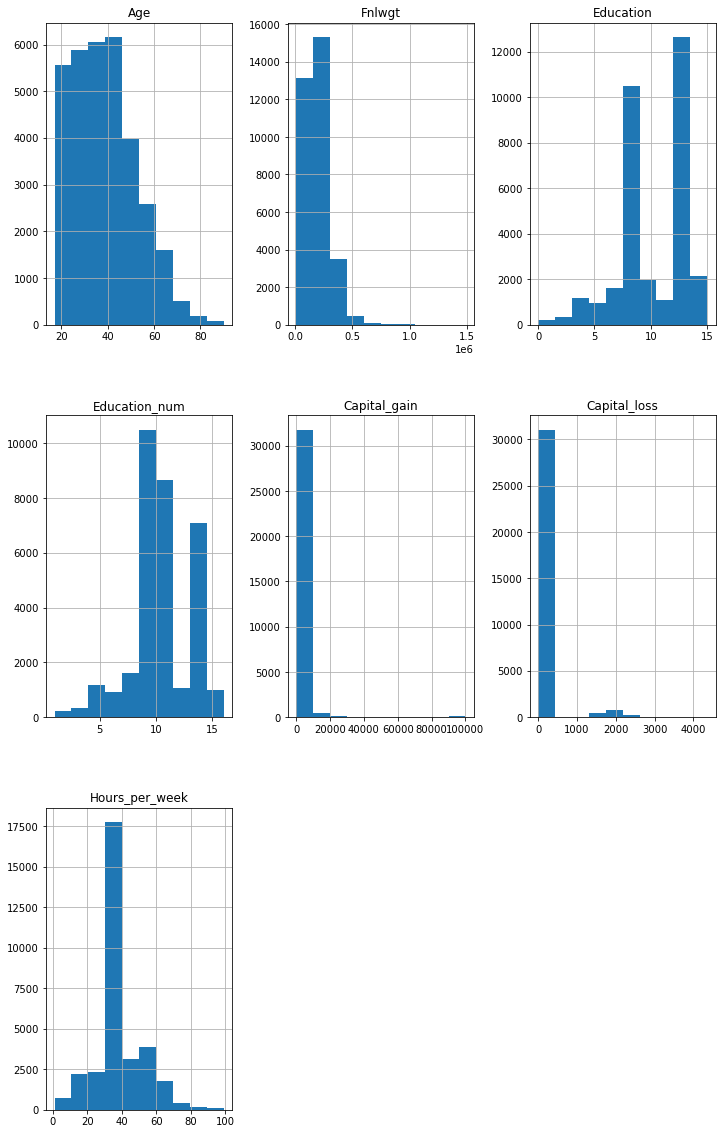

In [224]:
dfnum.hist(figsize=(12,20))

people spent more year in education have chances to get more than 50k.

To make more people are working either 30 hours possibly because they highly educated other are not making more may be becasue of less education

In [225]:
dfcat = df.select_dtypes(include=['object'])
print(dfcat.columns)
['Workclass', 'Education', 'Marital_Status', 'Occupation',        'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

Index(['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race',
       'Sex', 'Native_country', 'Income'],
      dtype='object')


['Workclass',
 'Education',
 'Marital_Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

<AxesSubplot:xlabel='count', ylabel='Workclass'>

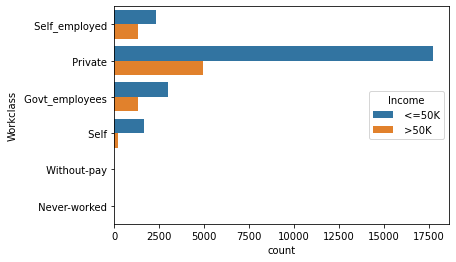

In [226]:
sns.countplot(y='Workclass', hue='Income', data = dfcat)

<AxesSubplot:xlabel='count', ylabel='Occupation'>

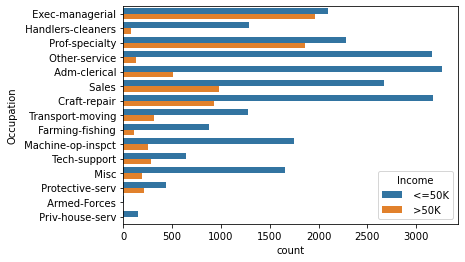

In [227]:
sns.countplot(y='Occupation', hue='Income', data = dfcat)

<AxesSubplot:xlabel='count', ylabel='Marital_status'>

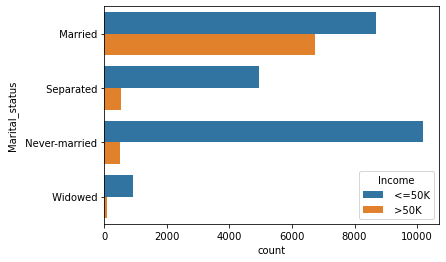

In [228]:
sns.countplot(y='Marital_status', hue='Income', data = dfcat)

# Married have more chances to get more than 50k

<AxesSubplot:xlabel='count', ylabel='Relationship'>

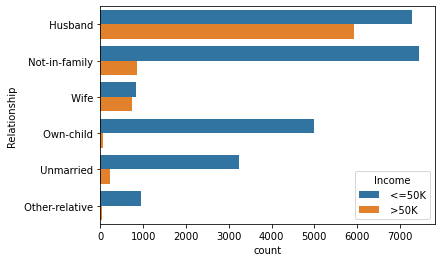

In [229]:
sns.countplot(y='Relationship', hue='Income', data = dfcat)

# Only Husband and only wife are getting more than 50k possibly beciase they are focued on work. Unmarried is not earning 50k possibly becuase he has recently started career

<AxesSubplot:xlabel='count', ylabel='Race'>

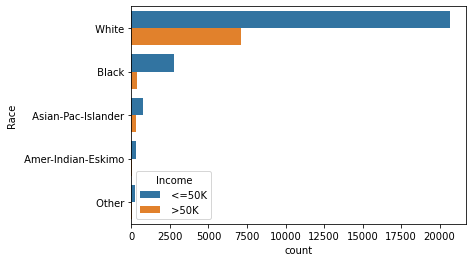

In [230]:
sns.countplot(y='Race', hue='Income', data = dfcat)

# White and Asian Pac islanders are getting more than 50k in good ratio

<AxesSubplot:xlabel='count', ylabel='Sex'>

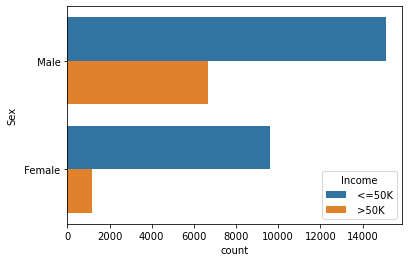

In [231]:
sns.countplot(y='Sex', hue='Income', data = dfcat)

# 40% Male are getting more than 50k.   Only 10% female getting more than 50k

<AxesSubplot:xlabel='count', ylabel='Native_country'>

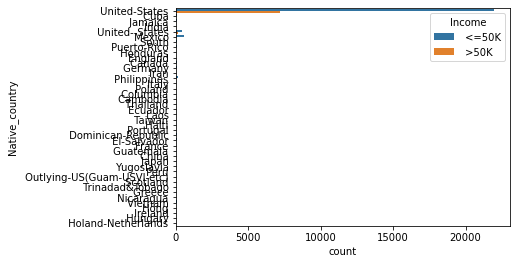

In [232]:
sns.countplot(y='Native_country', hue='Income', data = dfcat)

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32560 non-null  int64  
 1   Workclass       32560 non-null  object 
 2   Fnlwgt          32560 non-null  int64  
 3   Education       32560 non-null  float64
 4   Education_num   32560 non-null  int64  
 5   Marital_status  32560 non-null  object 
 6   Occupation      32560 non-null  object 
 7   Relationship    32560 non-null  object 
 8   Race            32560 non-null  object 
 9   Sex             32560 non-null  object 
 10  Capital_gain    32560 non-null  int64  
 11  Capital_loss    32560 non-null  int64  
 12  Hours_per_week  32560 non-null  int64  
 13  Native_country  32560 non-null  object 
 14  Income          32560 non-null  object 
dtypes: float64(1), int64(6), object(8)
memory usage: 3.7+ MB


In [235]:
df['Income'] = df['Income'].replace(' <=50K', ' 0')
df['Income'] = df['Income'].replace(' >50K', ' 1')
df['Income'] = df['Income'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32560 non-null  int64  
 1   Workclass       32560 non-null  object 
 2   Fnlwgt          32560 non-null  int64  
 3   Education       32560 non-null  float64
 4   Education_num   32560 non-null  int64  
 5   Marital_status  32560 non-null  object 
 6   Occupation      32560 non-null  object 
 7   Relationship    32560 non-null  object 
 8   Race            32560 non-null  object 
 9   Sex             32560 non-null  object 
 10  Capital_gain    32560 non-null  int64  
 11  Capital_loss    32560 non-null  int64  
 12  Hours_per_week  32560 non-null  int64  
 13  Native_country  32560 non-null  object 
 14  Income          32560 non-null  int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 3.7+ MB


In [242]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Workclass'] = LE.fit_transform(df['Workclass'])
df['Workclass'].value_counts()


2    22696
0     4350
4     3657
3     1836
5       14
1        7
Name: Workclass, dtype: int64

In [243]:


df['Marital_status'] = LE.fit_transform(df['Marital_status'])
df['Marital_status'].value_counts()


0    15417
1    10682
2     5468
3      993
Name: Marital_status, dtype: int64

In [244]:


df['Occupation'] = LE.fit_transform(df['Occupation'])
df['Occupation'].value_counts()


10    4140
3     4099
4     4066
1     3769
12    3650
8     3295
7     2002
0     1843
14    1597
6     1370
5      994
13     928
11     649
9      149
2        9
Name: Occupation, dtype: int64

In [245]:
df['Relationship'] = LE.fit_transform(df['Relationship'])
df['Relationship'].value_counts()


0    13193
1     8304
3     5068
4     3446
5     1568
2      981
Name: Relationship, dtype: int64

In [246]:
df['Race'] = LE.fit_transform(df['Race'])
df['Race'].value_counts()


4    27815
2     3124
1     1039
0      311
3      271
Name: Race, dtype: int64

In [249]:
df['Sex'] = LE.fit_transform(df['Sex'])
df['Sex'].value_counts()


1    21789
0    10771
Name: Sex, dtype: int64

In [247]:
df['Native_country'] = LE.fit_transform(df['Native_country'])
df['Native_country'].value_counts()


39    29169
25      643
38      583
29      198
10      137
1       121
32      114
7       106
18      100
4        95
8        90
22       81
34       80
2        75
21       73
5        70
40       67
12       64
23       62
30       60
3        59
35       51
13       44
19       43
31       37
26       34
28       31
9        29
11       29
6        28
20       24
16       20
0        19
37       19
24       18
36       18
41       16
27       14
17       13
15       13
33       12
14        1
Name: Native_country, dtype: int64

In [248]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,83311,13.0,13,0,4,0,4,Male,0,0,13,39,0
1,38,2,215646,8.0,9,2,6,1,4,Male,0,0,40,39,0
2,53,2,234721,6.0,7,0,6,0,2,Male,0,0,40,39,0
3,28,2,338409,13.0,13,0,10,5,2,Female,0,0,40,4,0
4,37,2,284582,14.0,14,0,4,5,4,Female,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2,257302,11.0,12,0,13,5,4,Female,0,0,38,39,0
32556,40,2,154374,8.0,9,0,7,0,4,Male,0,0,40,39,1
32557,58,2,151910,8.0,9,3,1,4,4,Female,0,0,40,39,0
32558,22,2,201490,8.0,9,1,1,3,4,Male,0,0,20,39,0


In [250]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.067782,-0.076646,-0.019959,0.036527,-0.025397,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,0.000405,0.234039
Workclass,0.067782,1.000000,-0.022240,-0.102910,-0.087960,-0.066633,-0.093311,-0.065656,0.067466,0.097011,0.056893,0.008703,0.055099,-0.015679,0.005920
Fnlwgt,-0.076646,-0.022240,1.000000,-0.040500,-0.043159,0.004237,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.064600,-0.009481
Education,-0.019959,-0.102910,-0.040500,1.000000,0.880847,-0.057067,0.066642,-0.051097,0.026982,-0.021828,0.061783,0.056858,0.095853,0.097334,0.261538
Education_num,0.036527,-0.087960,-0.043159,0.880847,1.000000,-0.089153,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.090376,0.335182
Marital_status,-0.025397,-0.066633,0.004237,-0.057067,-0.089153,1.000000,-0.053751,0.439240,-0.063188,-0.444441,-0.065508,-0.059768,-0.162255,0.025691,-0.352748
Occupation,-0.020946,-0.093311,0.001554,0.066642,0.109748,-0.053751,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.004015,0.075448
Relationship,-0.263698,-0.065656,0.008922,-0.051097,-0.094145,0.439240,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.011050,-0.250924
Race,0.028718,0.067466,-0.021278,0.026982,0.031825,-0.063188,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.122043,0.071853
Sex,0.088832,0.097011,0.026882,-0.021828,0.012256,-0.444441,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.001653,0.215995


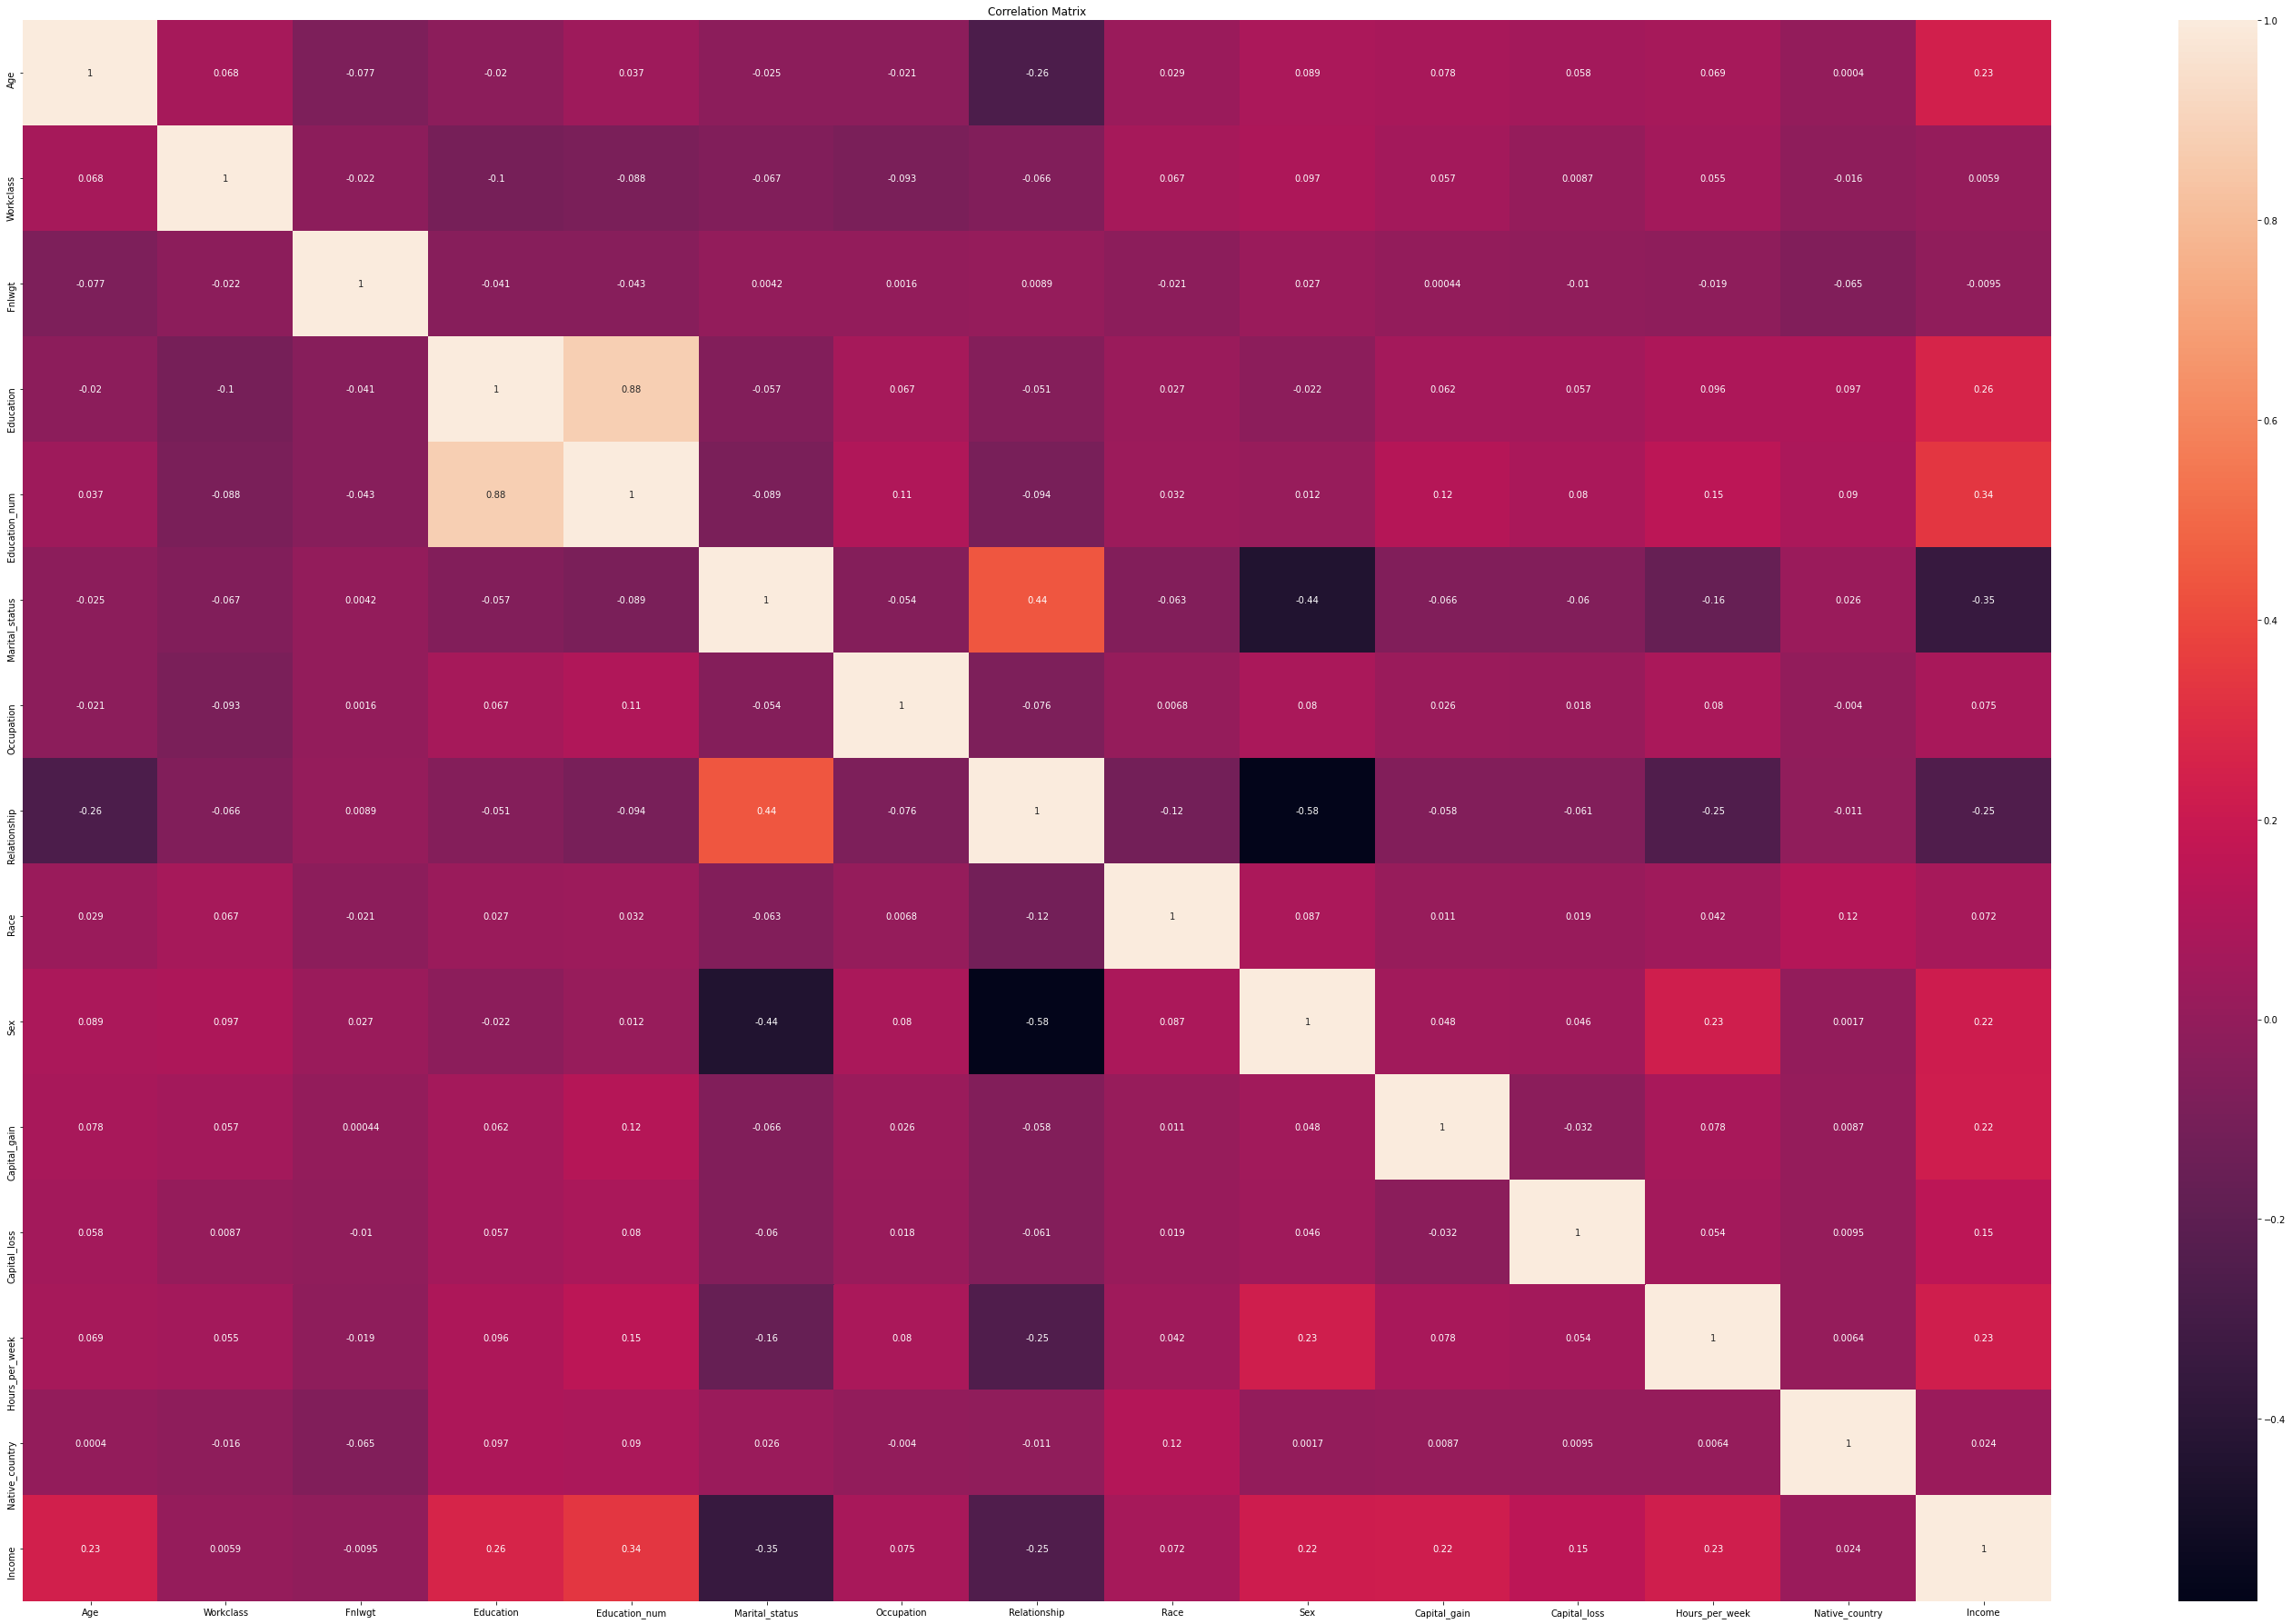

In [251]:
corr_mat = df.corr()

# Size of the canvasa
plt.figure(figsize=[50,32])

# plot the correlation matrix
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [252]:
corr_matrix = df.corr()
corr_matrix

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.067782,-0.076646,-0.019959,0.036527,-0.025397,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,0.000405,0.234039
Workclass,0.067782,1.000000,-0.022240,-0.102910,-0.087960,-0.066633,-0.093311,-0.065656,0.067466,0.097011,0.056893,0.008703,0.055099,-0.015679,0.005920
Fnlwgt,-0.076646,-0.022240,1.000000,-0.040500,-0.043159,0.004237,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.064600,-0.009481
Education,-0.019959,-0.102910,-0.040500,1.000000,0.880847,-0.057067,0.066642,-0.051097,0.026982,-0.021828,0.061783,0.056858,0.095853,0.097334,0.261538
Education_num,0.036527,-0.087960,-0.043159,0.880847,1.000000,-0.089153,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.090376,0.335182
Marital_status,-0.025397,-0.066633,0.004237,-0.057067,-0.089153,1.000000,-0.053751,0.439240,-0.063188,-0.444441,-0.065508,-0.059768,-0.162255,0.025691,-0.352748
Occupation,-0.020946,-0.093311,0.001554,0.066642,0.109748,-0.053751,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.004015,0.075448
Relationship,-0.263698,-0.065656,0.008922,-0.051097,-0.094145,0.439240,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.011050,-0.250924
Race,0.028718,0.067466,-0.021278,0.026982,0.031825,-0.063188,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.122043,0.071853
Sex,0.088832,0.097011,0.026882,-0.021828,0.012256,-0.444441,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.001653,0.215995


In [253]:
corr_matrix = df.corr()
corr_matrix["Income"].sort_values(ascending=False)

Income            1.000000
Education_num     0.335182
Education         0.261538
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Occupation        0.075448
Race              0.071853
Native_country    0.023761
Workclass         0.005920
Fnlwgt           -0.009481
Relationship     -0.250924
Marital_status   -0.352748
Name: Income, dtype: float64

Income is more correlated with Education_num and Education.  However we can take only 1 column out of these 2

It is also having good nbond with Age and Capital gain and Sex


Chking data distribution among all the column

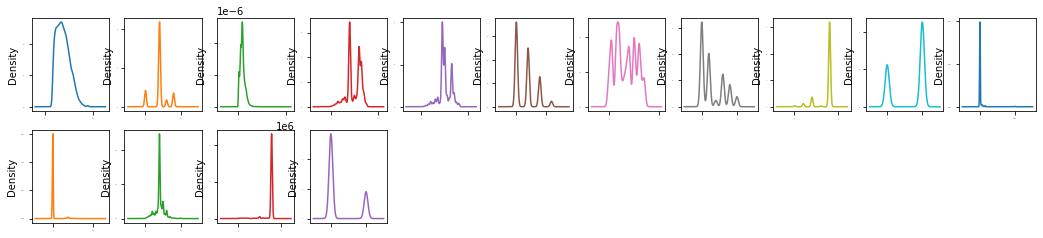

In [254]:
df.plot(kind = 'density', subplots=True, layout=(6,11), sharex=False, legend=False, fontsize = 1, figsize=(18,12))
plt.show()

It is evident that most coolumns have skewness

Splitting the independent and target variables in x and y before removing the skewness

In [268]:
x1 = df.drop("Income", axis=1)
y1 = df["Income"]

In [269]:
# Checking skewness
x1.skew().sort_values()

Native_country    -4.162539
Race              -2.435332
Sex               -0.719244
Education         -0.557199
Education_num     -0.311630
Workclass         -0.139836
Occupation         0.114540
Hours_per_week     0.227636
Age                0.558738
Relationship       0.786784
Marital_status     0.795162
Fnlwgt             1.446972
Capital_loss       4.594549
Capital_gain      11.953690
dtype: float64

lets use power trasnform function to remvoe skwness from these columns

In [270]:
from sklearn.preprocessing import power_transform
x1_new = power_transform(x1)
x1 = pd.DataFrame(x1_new, columns=x1.columns)

In [271]:
x1.skew().sort_values(ascending=False) # Validating that skewness has been removed or not 

Capital_loss      4.299511
Capital_gain      3.016951
Hours_per_week    0.229556
Marital_status    0.138593
Relationship      0.122917
Workclass         0.031561
Education_num     0.023885
Fnlwgt            0.016914
Age              -0.013897
Occupation       -0.187152
Education        -0.191924
Sex              -0.719244
Race             -2.010817
Native_country   -2.905835
dtype: float64

In [272]:
x1.skew()[np.abs(x1.skew())<0.15].all()     # abs is absolute value it remove minuss

True

In [273]:
x1.shape

(32560, 14)

Skewness has been removed, now we can proceed wiht further steps.

**Checing outliers**

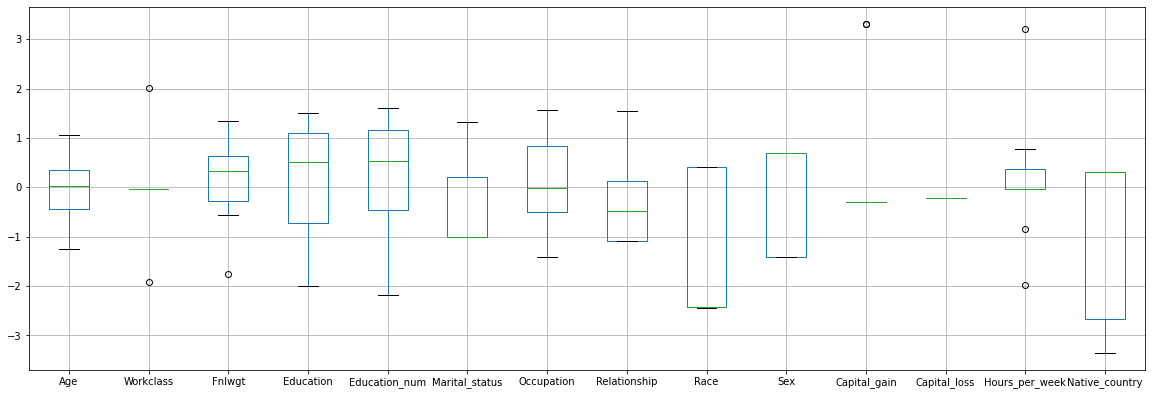

In [274]:
# Plotting boxplot for these columns

x1.iloc[1:15].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

Outlier removal

In [275]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))

threshold = 3
np.where(z>3)

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64),
 array([13, 12,  8, ...,  8,  8,  8], dtype=int64))

In [276]:
df_new_z = df[(z<3).all(axis=1)] # extract all the data points which have z value less than 3
df_new_z

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,83311,13.0,13,0,4,0,4,1,0,0,13,39,0
1,38,2,215646,8.0,9,2,6,1,4,1,0,0,40,39,0
2,53,2,234721,6.0,7,0,6,0,2,1,0,0,40,39,0
4,37,2,284582,14.0,14,0,4,5,4,0,0,0,40,39,0
5,49,2,160187,4.0,5,0,8,1,2,0,0,0,16,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2,257302,11.0,12,0,13,5,4,0,0,0,38,39,0
32556,40,2,154374,8.0,9,0,7,0,4,1,0,0,40,39,1
32557,58,2,151910,8.0,9,3,1,4,4,0,0,0,40,39,0
32558,22,2,201490,8.0,9,1,1,3,4,1,0,0,20,39,0


In [277]:
data_loss = (32560-27783)/32560*100

In [278]:
data_loss

14.67137592137592

I lost only 14% data, remaining data is still large enough to make a model

**Seperating the columns into features and target**

In [306]:
x = df_new_z.drop('Income', axis=1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 8.83812900e-01,  1.97874283e+00, -1.08771724e+00, ...,
        -3.72051139e-02, -2.41456099e+00,  1.95661762e-01],
       [-1.17166976e-02,  1.31671825e-03,  3.10402476e-01, ...,
        -3.72051139e-02,  6.74610750e-03,  1.95661762e-01],
       [ 1.10769530e+00,  1.31671825e-03,  5.11929914e-01, ...,
        -3.72051139e-02,  6.74610750e-03,  1.95661762e-01],
       ...,
       [ 1.48083263e+00,  1.31671825e-03, -3.62968574e-01, ...,
        -3.72051139e-02,  6.74610750e-03,  1.95661762e-01],
       [-1.20575616e+00,  1.31671825e-03,  1.60844290e-01, ...,
        -3.72051139e-02, -1.78681470e+00,  1.95661762e-01],
       [ 1.03306783e+00,  1.97874283e+00,  1.07405148e+00, ...,
        -3.72051139e-02,  6.74610750e-03,  1.95661762e-01]])

In [307]:
y = df_new_z['Income']

#### Now we will proceed to train our model**
### Training process begins
#### FInding best random_state

In [308]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [309]:
maxAccu=0        # maximum accuracy
maxRS=0          # best random state value for which max accuracy is achieved
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is', maxAccu,  'on Random_state',maxRS)

Best Accuracy is 0.8526183192369984 on Random_state 133


We have found best random_state value as 190, We will create our train_test split using this random_state

**Creating train-test split**

In [310]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state = 184)

In [311]:
x_train.shape

(22226, 14)

In [312]:
x_test.shape

(5557, 14)

In [313]:
y_train.shape

(22226,)

In [314]:
y_test.shape

(5557,)

### Logistics Regression

In [315]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
predlr = lr.predict(x_test)

print('accuracy', accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

accuracy 84.05614540219543
[[4029  236]
 [ 650  642]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4265
           1       0.73      0.50      0.59      1292

    accuracy                           0.84      5557
   macro avg       0.80      0.72      0.75      5557
weighted avg       0.83      0.84      0.83      5557



### Decision tree Classifier

In [316]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt  = dt.predict(x_test)

print("Accuracy", accuracy_score(y_test, preddt)*100)
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

Accuracy 80.2231419830844
[[3714  551]
 [ 548  744]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4265
           1       0.57      0.58      0.58      1292

    accuracy                           0.80      5557
   macro avg       0.72      0.72      0.72      5557
weighted avg       0.80      0.80      0.80      5557



### Random Forest Classifier

In [317]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print("Accuracy", accuracy_score(y_test, predrf)*100)
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test, predrf))

Accuracy 84.38006118409214
[[3968  297]
 [ 571  721]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4265
           1       0.71      0.56      0.62      1292

    accuracy                           0.84      5557
   macro avg       0.79      0.74      0.76      5557
weighted avg       0.84      0.84      0.84      5557



### SVC

In [318]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

ad_pred = svc.predict(x_test)
print("Accuracy", accuracy_score(y_test, ad_pred)*100)
print(confusion_matrix(y_test, ad_pred))
print(classification_report(y_test, ad_pred))

Accuracy 84.81194889328775
[[4081  184]
 [ 660  632]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      4265
           1       0.77      0.49      0.60      1292

    accuracy                           0.85      5557
   macro avg       0.82      0.72      0.75      5557
weighted avg       0.84      0.85      0.83      5557



Logistic Regression, Random Forest, and SVC are producing good accuracy. Now we will check cross validation score as well for overfitting (if exist)

### Cross Validation

In [319]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(lr, x, y, cv=5)
print("Cross validation score of Logistic Regression model :", scr.mean())

Cross validation score of Logistic Regression model : 0.8402262280057725


In [320]:
scr = cross_val_score(rf, x, y, cv=5)
print("Cross validation score of Random Forest model:", scr.mean())

Cross validation score of Random Forest model: 0.8507723607412828


In [321]:
scr = cross_val_score(svc, x, y, cv=5)
print("Cross Validation score of SVC model :", scr.mean())

Cross Validation score of SVC model : 0.8508081570497934


RandomForestClassifier is performing better among all so we will continue with RandomForestClassifier

### Hyperparameter tuning

In [322]:
from sklearn.model_selection import GridSearchCV

# Creating parameter list

parameters = {'max_features': ['auto', 'sqrt', 'log2'],
             'max_depth' : [4,5,6,7,8],
             'criterion': ['gini', 'entropy']}

In [323]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5, scoring="accuracy")
GCV.fit(x_train, y_train) # Fitting the data in model
GCV.best_params_ # Printing the best parameter found by GridsearchCV

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}

In [324]:
GCV_pred = GCV.best_estimator_.predict(x_test) # predicting with best parameters
accuracy_score(y_test, GCV_pred)  # Checking final accuracy

0.8493791614180313

### ROC AUC Plot

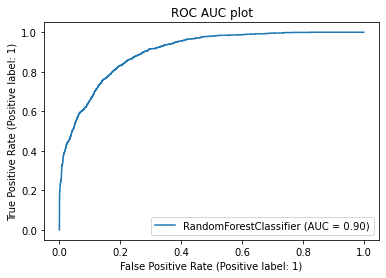

In [325]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

Final accuracy is 85% and AUC score is 90% which is pretty good

### Saving the model in pickle format

In [327]:
#Pickeling of file or Serialization of a file
import joblib
joblib.dump(GCV.best_estimator_,"Census_income.pkl")

['Census_income.pkl']